## Feature Coefficient Analysis and Regularization

In this notebook, we explore how **regularization affects the coefficients** of a logistic regression model. Understanding the relationship between the regularization parameter `C` and coefficient magnitude is crucial for **feature ranking and selection**. By fitting models across a range of `C` values, we can observe how each feature's contribution changes under different levels of penalty. This allows us to identify **stable and important features**, understand the effect of shrinkage, and guide decisions about which features to retain for downstream modeling or interpretation.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_diabetes

In [2]:
X = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
y = pd.Series(load_diabetes().target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
coeff_dict = []
for penalty in [1e-10, 1, 2, 10, 1000]:
    model = LogisticRegression(
        C=penalty,
        random_state=42,
        penalty='l2',
        max_iter=1000
    )
    model.fit(X_train_scaled, y_train)
    coeff_dict.append(model.coef_[0])

coeff_df = pd.DataFrame(coeff_dict, columns=X.columns)
coeff_df['penalty'] = [1e-10, 1, 2, 10, 1000]
coeff_df.set_index('penalty', inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instea

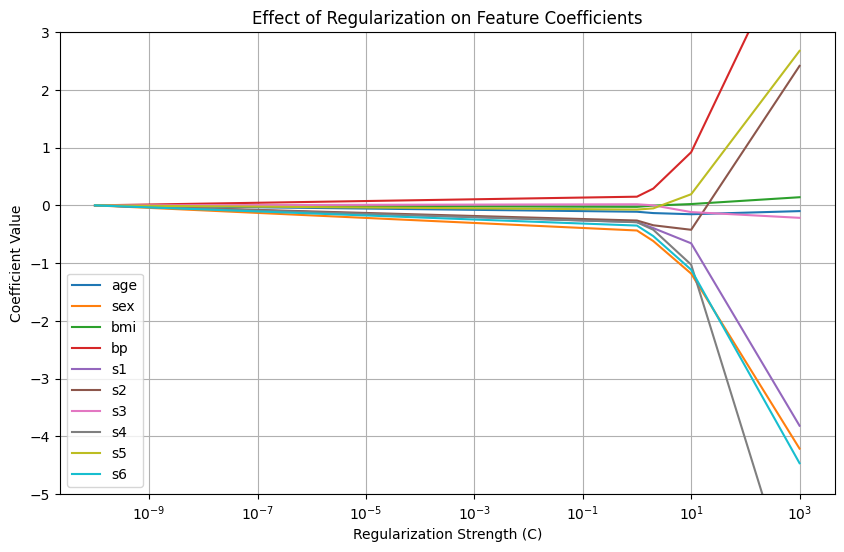

In [6]:
plt.figure(figsize=(10, 6))
for column in coeff_df.columns:
    plt.plot(coeff_df.index, coeff_df[column], label=column)
plt.xscale('log')
plt.ylim(-5, 3)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Coefficient Value')
plt.title('Effect of Regularization on Feature Coefficients')
plt.legend()
plt.grid()
plt.show()

The magnitude of the coefficients in a logistic regression model depends strongly on the **regularization strength**, controlled by the parameter `C`. A **small `C`** corresponds to strong regularization, which shrinks all coefficients toward zero, reducing their absolute values and potentially making them less distinguishable. Conversely, a **large `C`** corresponds to weak regularization, allowing the coefficients to reflect the true contribution of each feature more accurately. By examining how coefficients change across a range of `C` values, we can observe which features are **robust and important** versus those that are **sensitive to regularization**.
